
# CODE TO PERFORM SIMPLE LINEAR REGRESSION






# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# STEP #1: LIBRARIES IMPORT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = os.path.abspath('week5\IceCreamData.csv')
!ls '/content/drive/My Drive/projects/for-testing'


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3781718055.py, line 1)

In [46]:
IceCream = pd.read_csv(data_dir)

/content/drive/My Drive/projects/for-testing/IceCreamData.csv


In [47]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685945,343.362905


In [48]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [49]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [50]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

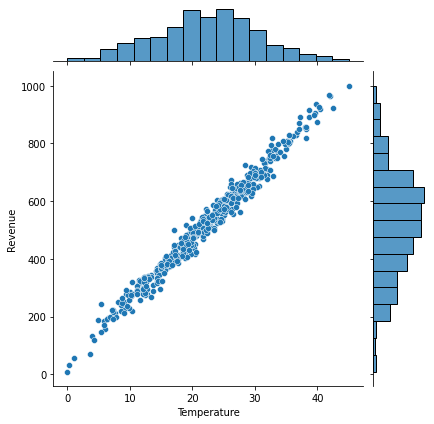

In [ ]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

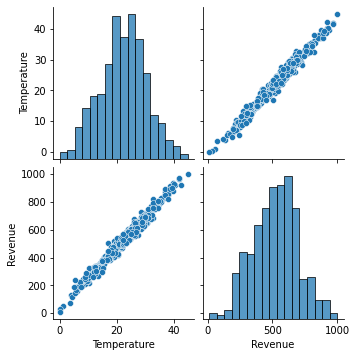

In [53]:
sns.pairplot(IceCream)

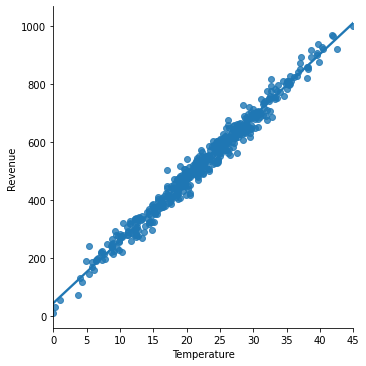

In [54]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [55]:
y = IceCream['Revenue']

In [56]:
X = IceCream[['Temperature']]

In [57]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [58]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [127]:
X_train.shape

(375, 1)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
regressor = LinearRegression(fit_intercept = True)

In [130]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.37011027]
Linear Model Coefficient (b):  46.40805140344793


# STEP#6: TEST THE MODEL 

In [145]:
from sklearn.model_selection import cross_val_score
cv_score = np.mean(cross_val_score(regressor, X_train, y_train, cv=3))
print (cv_score)

0.9786674627348838


In [132]:
y_predict = regressor.predict(X_test)
y_predict

array([ 421.9713831 ,  218.07741604,  510.22391769,  450.0287785 ,
        795.07687623,  186.22230549,  308.63996394,  571.8116243 ,
        658.6444416 ,  482.59403903,  799.00435502,  384.97517873,
        609.7352844 ,  580.41545764,  558.42118608,  519.81131442,
        453.86320628,  718.95158538,  479.09606463,  563.22145735,
        525.05529565,  655.28017911,  588.79079514,  285.49164829,
        642.35868552,  554.19255713,  571.40508039,  589.68252561,
        347.93306324,  245.34979337,  522.631349  ,  694.57058364,
        430.92087755,  570.44261999,  541.19025396,  664.00833521,
        743.77582841,  400.20823953,  160.49051888,  787.48172854,
        493.0159219 ,  332.0048975 ,  583.14123487,  409.65481215,
        591.27372008,  650.38786506,  564.42748401,  613.36175194,
        796.92955986,  504.25321359,  493.7829255 ,  723.16706679,
        626.13915243,  322.09670357,  479.02776597,  394.74351939,
        451.42550797,  458.16275044,  545.37948668,  758.35322

In [137]:
# y_test = y_test.to_numpy()
print(y_predict.shape)
print(y_test.shape)
print (X_test.shape)
X_test.Temperature

(125,)
(125,)
(125, 1)


393    17.574235
343     8.033153
256    21.703953
473    18.887162
277    35.033456
         ...    
20     25.457836
25     18.978300
114    17.690032
57     36.569115
124    12.571514
Name: Temperature, Length: 125, dtype: float64

In [138]:
result = {'x_test' : X_test.Temperature,'y_test' : y_test,
             'y_predict' : y_predict}   
output = pd.DataFrame(result)

output.sample()

,x_test,y_test,y_predict
435,15.916678,381.043377,386.549212


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

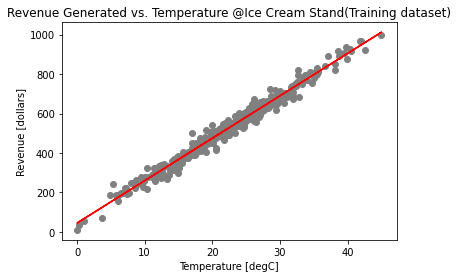

In [115]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature [degC] @Ice Cream Stand(Test dataset)')

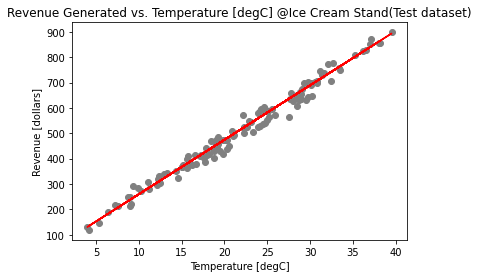

In [116]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature [degC] @Ice Cream Stand(Test dataset)')

In [139]:
value = [[15.916678]] 
value_predict = regressor.predict(value)
value_predict

array([386.54921536])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION